In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('well_data_standard.csv')

In [9]:
df.columns
df['performance_index'].max()

1161.0457063613849

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   well_id                  500 non-null    int64  
 1   permeability_md          500 non-null    float64
 2   porosity_fraction        500 non-null    float64
 3   net_to_gross             500 non-null    float64
 4   thickness_ft             500 non-null    float64
 5   well_depth_ft            500 non-null    float64
 6   tubing_diameter_in       500 non-null    float64
 7   choke_size_64th          500 non-null    float64
 8   well_type                500 non-null    object 
 9   completion_type          500 non-null    object 
 10  artificial_lift          500 non-null    object 
 11  reservoir_pressure_psi   500 non-null    float64
 12  reservoir_temp_f         500 non-null    float64
 13  bottomhole_pressure_psi  500 non-null    float64
 14  wellhead_pressure_psi    5

In [4]:
df.head()

,well_id,permeability_md,porosity_fraction,net_to_gross,thickness_ft,well_depth_ft,tubing_diameter_in,choke_size_64th,well_type,completion_type,...,economic_efficiency,ranking_score,drill_date,well_age_days,production_months,days_since_workover,pressure_drawdown,total_liquid_rate,productivity_factor,depth_category
0,1,12.142530,0.196309,0.731930,24.336113,7816.914302,2.875,40.952149,Horizontal,Slotted Liner,...,0.566380,25.568573,2015-09-27,3384,22.669507,618.370405,718.167260,10.509183,2.383686,Medium
1,2,6.434896,0.245471,0.817931,133.211654,5886.339608,2.875,19.802734,Horizontal,Perforated,...,0.238650,25.975528,2021-03-13,1390,40.224882,30.000000,602.111844,6.285304,1.579579,Medium
2,3,14.121360,0.080072,0.730540,73.854045,7387.046131,2.875,21.256347,Vertical,Perforated,...,0.201002,23.867400,2023-12-06,392,31.995545,156.461027,593.449058,6.863953,1.130720,Medium
3,4,33.886946,0.178148,0.798838,55.712522,8718.228122,3.500,43.169706,Deviated,Perforated,...,1.062554,30.497943,2018-01-03,2555,3.784677,211.937914,477.343360,10.491690,6.036907,Deep
4,5,5.846520,0.117468,0.818555,33.298320,9019.363528,4.500,54.476617,Deviated,Perforated,...,-0.267991,23.871175,2019-09-06,1944,46.007405,397.470614,474.375846,6.534027,0.686778,Deep


In [23]:
def create_visualization_report(filename='well_data.csv', output_file='data_summary.png'):
    """
    Create comprehensive visualization report of the generated data
    
    Parameters:
    -----------
    filename : str
        CSV filename to analyze
    output_file : str
        Output image filename
    """
    print("Creating visualization report...")
    
    # Load data
    df = pd.read_csv(filename)
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(4, 3, figsize=(20, 24))
    fig.suptitle('Well Performance Dataset - Comprehensive Analysis', fontsize=20, fontweight='bold')
    
    # 1. Production rate distribution
    axes[0,0].hist(df['oil_rate_bbl_day'], bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[0,0].set_title('Oil Production Rate Distribution', fontweight='bold')
    axes[0,0].set_xlabel('Oil Rate (bbl/day)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Reservoir quality
    scatter = axes[0,1].scatter(df['permeability_md'], df['porosity_fraction'], 
                               c=df['oil_rate_bbl_day'], alpha=0.6, s=30, cmap='viridis')
    axes[0,1].set_xlabel('Permeability (mD)')
    axes[0,1].set_ylabel('Porosity (fraction)')
    axes[0,1].set_title('Reservoir Quality vs Production', fontweight='bold')
    axes[0,1].set_xscale('log')
    plt.colorbar(scatter, ax=axes[0,1], label='Oil Rate (bbl/day)')
    
    # 3. Water cut impact
    axes[0,2].scatter(df['water_cut_fraction'], df['oil_rate_bbl_day'], alpha=0.5, color='red')
    axes[0,2].set_xlabel('Water Cut (fraction)')
    axes[0,2].set_ylabel('Oil Rate (bbl/day)')
    axes[0,2].set_title('Water Cut Impact on Production', fontweight='bold')
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Economic performance
    colors = ['red' if x < 0 else 'green' for x in df['daily_revenue_usd']]
    axes[1,0].scatter(df['oil_rate_bbl_day'], df['daily_revenue_usd'], 
                     c=colors, alpha=0.6)
    axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.7)
    axes[1,0].set_xlabel('Oil Rate (bbl/day)')
    axes[1,0].set_ylabel('Daily Revenue ($)')
    axes[1,0].set_title('Economic Performance', fontweight='bold')
    axes[1,0].grid(True, alpha=0.3)
    
    # 5. Well type comparison
    well_type_data = [df[df['well_type'] == wt]['oil_rate_bbl_day'].values 
                      for wt in df['well_type'].unique()]
    well_type_labels = df['well_type'].unique()
    axes[1,1].boxplot(well_type_data, labels=well_type_labels)
    axes[1,1].set_title('Production by Well Type', fontweight='bold')
    axes[1,1].set_ylabel('Oil Rate (bbl/day)')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    # 6. Artificial lift comparison
    lift_type_data = [df[df['artificial_lift'] == lt]['oil_rate_bbl_day'].values 
                      for lt in df['artificial_lift'].unique()]
    lift_type_labels = df['artificial_lift'].unique()
    axes[1,2].boxplot(lift_type_data, labels=lift_type_labels)
    axes[1,2].set_title('Production by Artificial Lift', fontweight='bold')
    axes[1,2].set_ylabel('Oil Rate (bbl/day)')
    axes[1,2].tick_params(axis='x', rotation=45)
    
    # 7. Depth vs production
    axes[2,0].scatter(df['well_depth_ft'], df['oil_rate_bbl_day'], alpha=0.5, color='blue')
    axes[2,0].set_xlabel('Well Depth (ft)')
    axes[2,0].set_ylabel('Oil Rate (bbl/day)')
    axes[2,0].set_title('Depth vs Production', fontweight='bold')
    axes[2,0].grid(True, alpha=0.3)
    
    # 8. Performance index distribution
    axes[2,1].hist(df['performance_index'], bins=50, alpha=0.7, color='orange', edgecolor='black')
    axes[2,1].set_title('Performance Index Distribution', fontweight='bold')
    axes[2,1].set_xlabel('Performance Index')
    axes[2,1].set_ylabel('Frequency')
    axes[2,1].grid(True, alpha=0.3)
    
    # 9. Correlation heatmap
    corr_cols = ['permeability_md', 'porosity_fraction', 'water_cut_fraction', 
                 'oil_rate_bbl_day', 'daily_revenue_usd', 'performance_index']
    corr_matrix = df[corr_cols].corr()
    im = axes[2,2].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    axes[2,2].set_xticks(range(len(corr_cols)))
    axes[2,2].set_yticks(range(len(corr_cols)))
    axes[2,2].set_xticklabels([col.replace('_', '\n') for col in corr_cols], rotation=45, ha='right')
    axes[2,2].set_yticklabels([col.replace('_', '\n') for col in corr_cols])
    axes[2,2].set_title('Feature Correlation Matrix', fontweight='bold')
    
    # Add correlation values to heatmap
    for i in range(len(corr_cols)):
        for j in range(len(corr_cols)):
            axes[2,2].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                          ha="center", va="center", color="black", fontweight='bold')
    
    # 10. Pressure analysis
    axes[3,0].scatter(df['pressure_drawdown'], df['oil_rate_bbl_day'], alpha=0.5, color='purple')
    axes[3,0].set_xlabel('Pressure Drawdown (psi)')
    axes[3,0].set_ylabel('Oil Rate (bbl/day)')
    axes[3,0].set_title('Pressure Drawdown vs Production', fontweight='bold')
    axes[3,0].grid(True, alpha=0.3)
    
    # 11. Economic efficiency
    axes[3,1].scatter(df['daily_opex_usd'], df['daily_revenue_usd'], alpha=0.5, color='brown')
    axes[3,1].plot([df['daily_opex_usd'].min(), df['daily_opex_usd'].max()], 
                   [df['daily_opex_usd'].min(), df['daily_opex_usd'].max()], 
                   'r--', label='Break-even line')
    axes[3,1].set_xlabel('Daily OPEX ($)')
    axes[3,1].set_ylabel('Daily Revenue ($)')
    axes[3,1].set_title('Revenue vs Operating Costs', fontweight='bold')
    axes[3,1].legend()
    axes[3,1].grid(True, alpha=0.3)
    
    # 12. Well age analysis
    axes[3,2].scatter(df['well_age_days'], df['oil_rate_bbl_day'], alpha=0.5, color='gray')
    axes[3,2].set_xlabel('Well Age (days)')
    axes[3,2].set_ylabel('Oil Rate (bbl/day)')
    axes[3,2].set_title('Well Age vs Production', fontweight='bold')
    axes[3,2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Visualization report saved to {output_file}")
    plt.show()


        


Creating visualization report...


C:\Users\Subil Varghese Jacob\AppData\Local\Temp\ipykernel_676\3782154950.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot(well_type_data, labels=well_type_labels)
C:\Users\Subil Varghese Jacob\AppData\Local\Temp\ipykernel_676\3782154950.py:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,2].boxplot(lift_type_data, labels=lift_type_labels)


Visualization report saved to standard_dataset_analysis.png


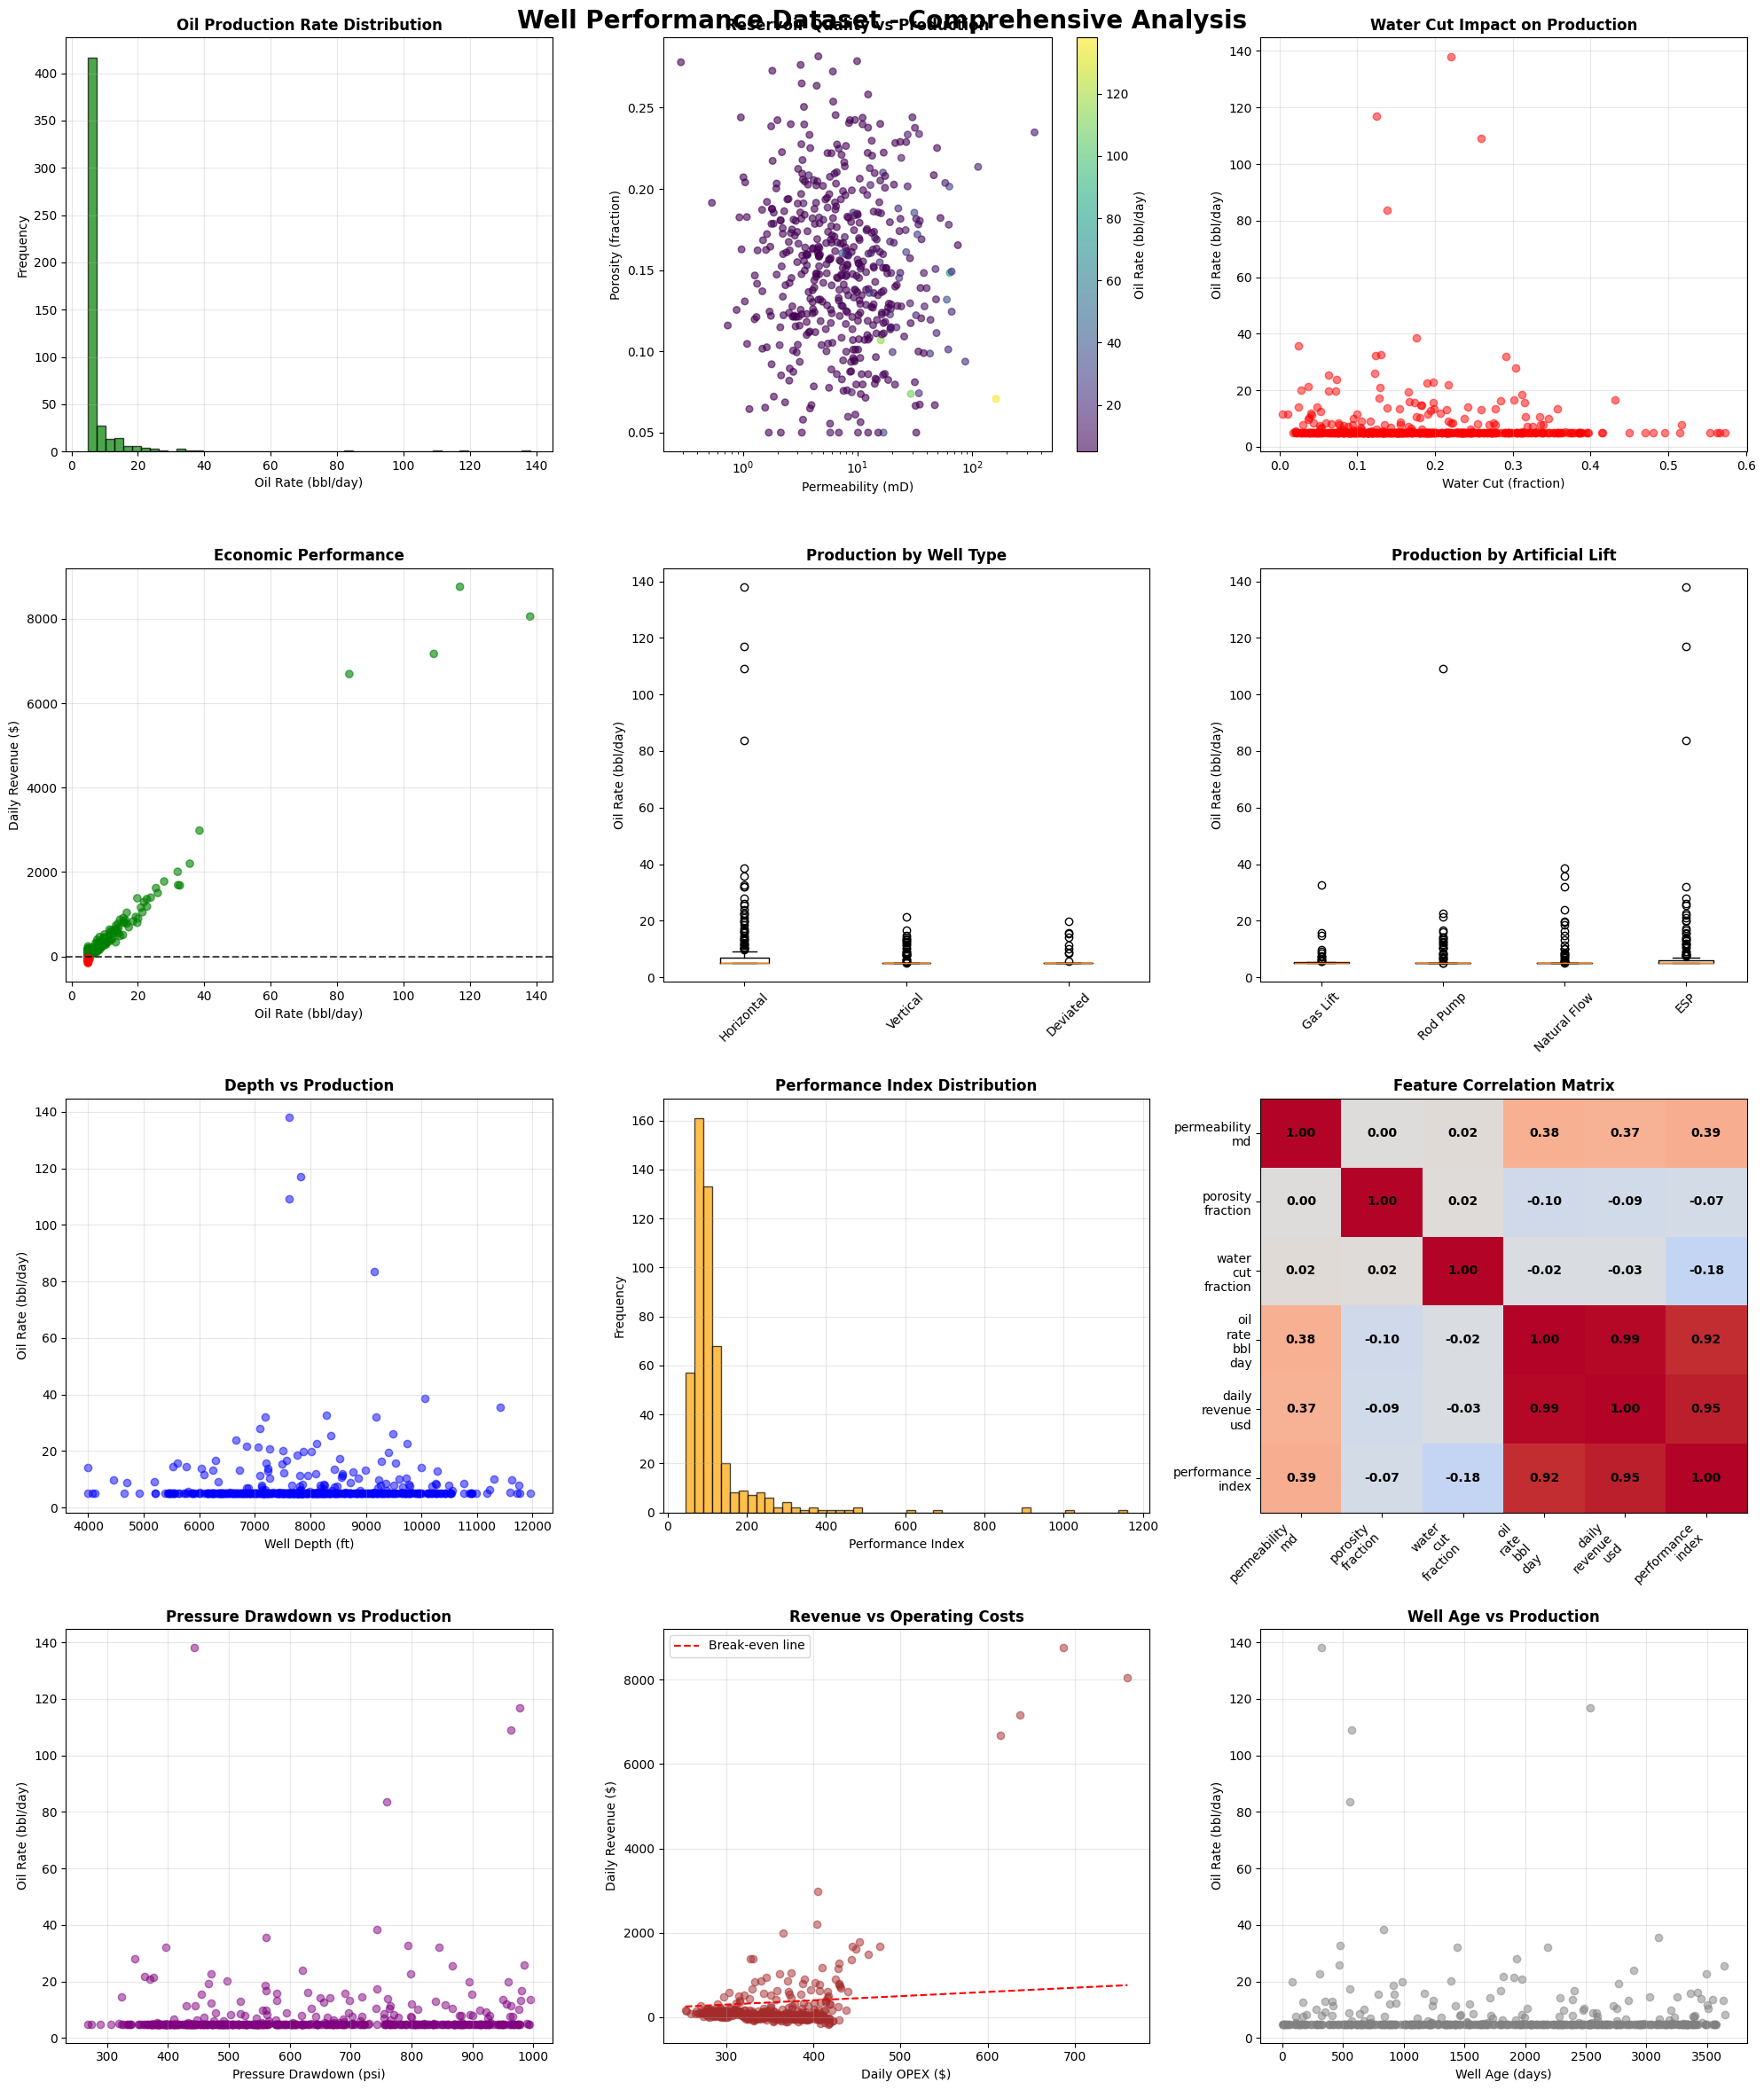

In [24]:
create_visualization_report('well_data_standard.csv', 'standard_dataset_analysis.png') 

In [2]:
|


SyntaxError: invalid syntax (2873296125.py, line 1)